In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
features = pd.read_parquet('data/consolidated_features.parquet')
features

,"g-r_mean_g,r","g-r_max_g,r",MHPS_ratio_g,MHPS_low_g,MHPS_high_g,MHPS_non_zero_g,MHPS_PN_flag_g,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,...,last_brightness_before_band_r,max_brightness_before_band_r,median_brightness_before_band_r,n_forced_phot_band_after_r,max_brightness_after_band_r,median_brightness_after_band_r,Timespan_nan,Coordinate_x_nan,Coordinate_y_nan,Coordinate_z_nan
ZTF17aaaaajz,3.615267,3.822370,30.711777,0.774220,0.025209,16.0,0.0,177.283524,8.060606,0.045467,...,NaN,NaN,NaN,30.0,14.045668,-21.270028,1105.996612,0.313545,0.544991,0.777608
ZTF17aaaaauo,2.860304,3.132062,62.342686,0.794596,0.012746,85.0,0.0,404.756195,32.900173,0.081284,...,NaN,NaN,NaN,335.0,38.115958,-17.470143,1189.904361,0.512471,-0.383321,0.768400
ZTF17aaaabte,0.402163,0.314832,6.494788,13.016955,2.004215,346.0,0.0,4.811527,13.618223,2.830333,...,NaN,NaN,NaN,8.0,23.676932,12.574368,1103.997452,0.735010,0.388589,0.555661
ZTF17aaaacnc,1.161628,1.169291,7.155207,141.709427,19.805079,57.0,0.0,2.390272,20.290277,8.488688,...,24.934262,24.934262,15.044657,58.0,46.501532,7.913954,946.710828,0.141737,0.981563,0.128237
ZTF17aaaactd,2.424023,2.139564,11.487591,332.585602,28.951729,55.0,0.0,3.714489,57.510006,15.482615,...,NaN,NaN,NaN,18.0,48.614857,-7.034458,941.691661,0.058632,0.998279,0.000834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF21abjxsfk,0.887585,0.478459,0.374054,22.948868,61.351761,32.0,0.0,1.118675,21.052525,18.819155,...,NaN,NaN,NaN,2.0,13.339469,-4.896832,396.873839,-0.406051,-0.821921,-0.399460
ZTF21abkkmgv,0.137637,0.048160,0.490146,631.981873,1289.373535,39.0,0.0,4.391626,1173.252319,267.156677,...,NaN,NaN,NaN,3.0,8.772233,-1.687960,390.020934,0.782398,-0.564203,-0.263681
ZTF21abkmjvz,0.450167,0.469808,0.860111,2.525935,2.936755,29.0,0.0,1.645134,179.439194,109.072685,...,NaN,NaN,NaN,1.0,-28.689909,-28.689909,395.956321,-0.559801,-0.738931,-0.374972
ZTF21abkrizh,1.458699,1.565268,1.079471,0.256655,0.237760,56.0,0.0,0.273014,3.502917,12.830515,...,NaN,NaN,NaN,17.0,51.037151,23.933080,358.039770,0.439231,0.651895,0.618149


## Period

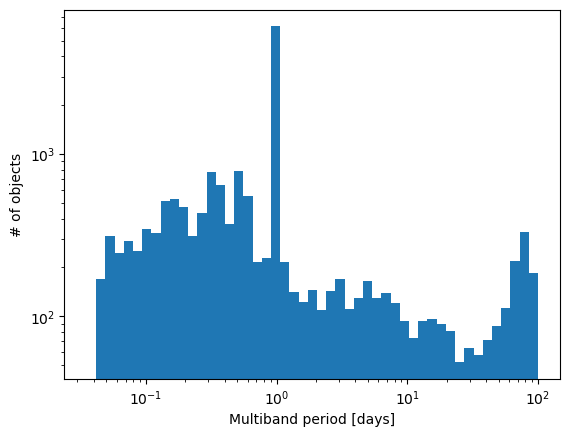

In [14]:
bins = 10**(np.linspace(-1.45, 2, 50))
plt.loglog()
plt.hist(features['Multiband_period_g,r'], bins=bins)
plt.xlabel('Multiband period [days]')
plt.ylabel('# of objects');

## Number of NaNs

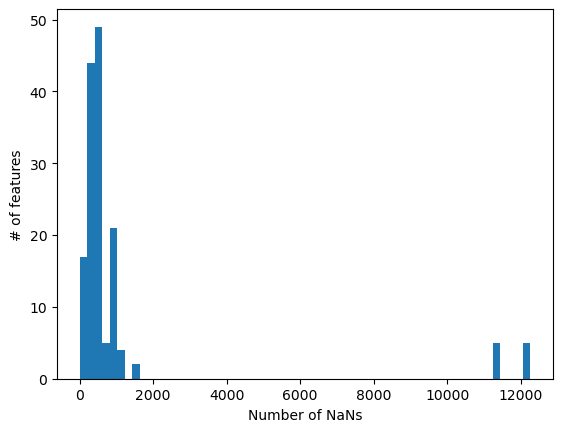

In [16]:
n_nans = features.isna().sum(axis=0).values
plt.hist(n_nans, bins=60)
plt.xlabel('Number of NaNs')
plt.ylabel('# of features');

## Labels

In [18]:
object_info = pd.read_pickle('data/objects.pkl')
object_info.set_index('oid', inplace=True)
object_info = object_info.loc[features.index]
object_info

,ra,dec,submitter,alerceclass
ZTF17aaaaajz,60.087284,51.042116,ecamacho,LPV
ZTF17aaaaauo,323.204037,50.210405,ecamacho,LPV
ZTF17aaaabte,27.864746,33.756286,fforster,EBEW
ZTF17aaaacnc,81.783311,7.367733,sbernal,RSCVn
ZTF17aaaactd,86.638705,0.047768,abayo,YSO
...,...,...,...,...
ZTF21abjxsfk,243.709402,-23.544438,abayo,YSO
ZTF21abkkmgv,324.203891,-15.288609,amunoz,RRLc
ZTF21abkmjvz,232.853061,-22.022576,gpignata,Periodic-Other
ZTF21abkrizh,56.028903,38.181117,gcabrera,Ceph


In [21]:
print('features weight', np.prod(features.shape)*4/1e6, 'MB')

features weight 10.754304 MB
